# <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Data Science Academy</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.3


In [20]:
#!pip install matplotlib
#!pip install seaborn
#!pip install jedi==0.19.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: jedi
    Found existing installation: jedi 0.19.1
    Uninstalling jedi-0.19.1:
      Successfully uninstalled jedi-0.19.1


In [46]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [47]:
# Carrega o dataset
dfpy = pd.read_csv('dados/dataset.csv')

In [48]:
# Shape
dfpy.shape

(9700, 11)

In [49]:
# Amostra dos dados
dfpy.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [50]:
# Amostra dos dados
dfpy.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [51]:
# Colunas do conjunto de dados
dfpy.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [52]:
# Verificando o tipo de dado de cada coluna
dfpy.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [53]:
# Resumo estatístico da coluna com o valor de venda
dfpy['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [54]:
# Verificando se há registros duplicados
dfpy[dfpy.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [55]:
# Verificando de há valores ausentes
dfpy.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [56]:
#dfpy.head()

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [57]:
df_ofsp = dfpy[dfpy['Categoria'] == 'Office Supplies']

In [58]:
df_cities_sales = df_ofsp.groupby('Cidade')['Valor_Venda'].sum() # agrupa somando as vendas de uma mesma cidade, e separar por cidade

In [59]:
top_sales_city = df_cities_sales.idxmax()

In [60]:
print("City with highest sales: " + top_sales_city)

City with highest sales: New York City


In [61]:
df_cities_sales.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

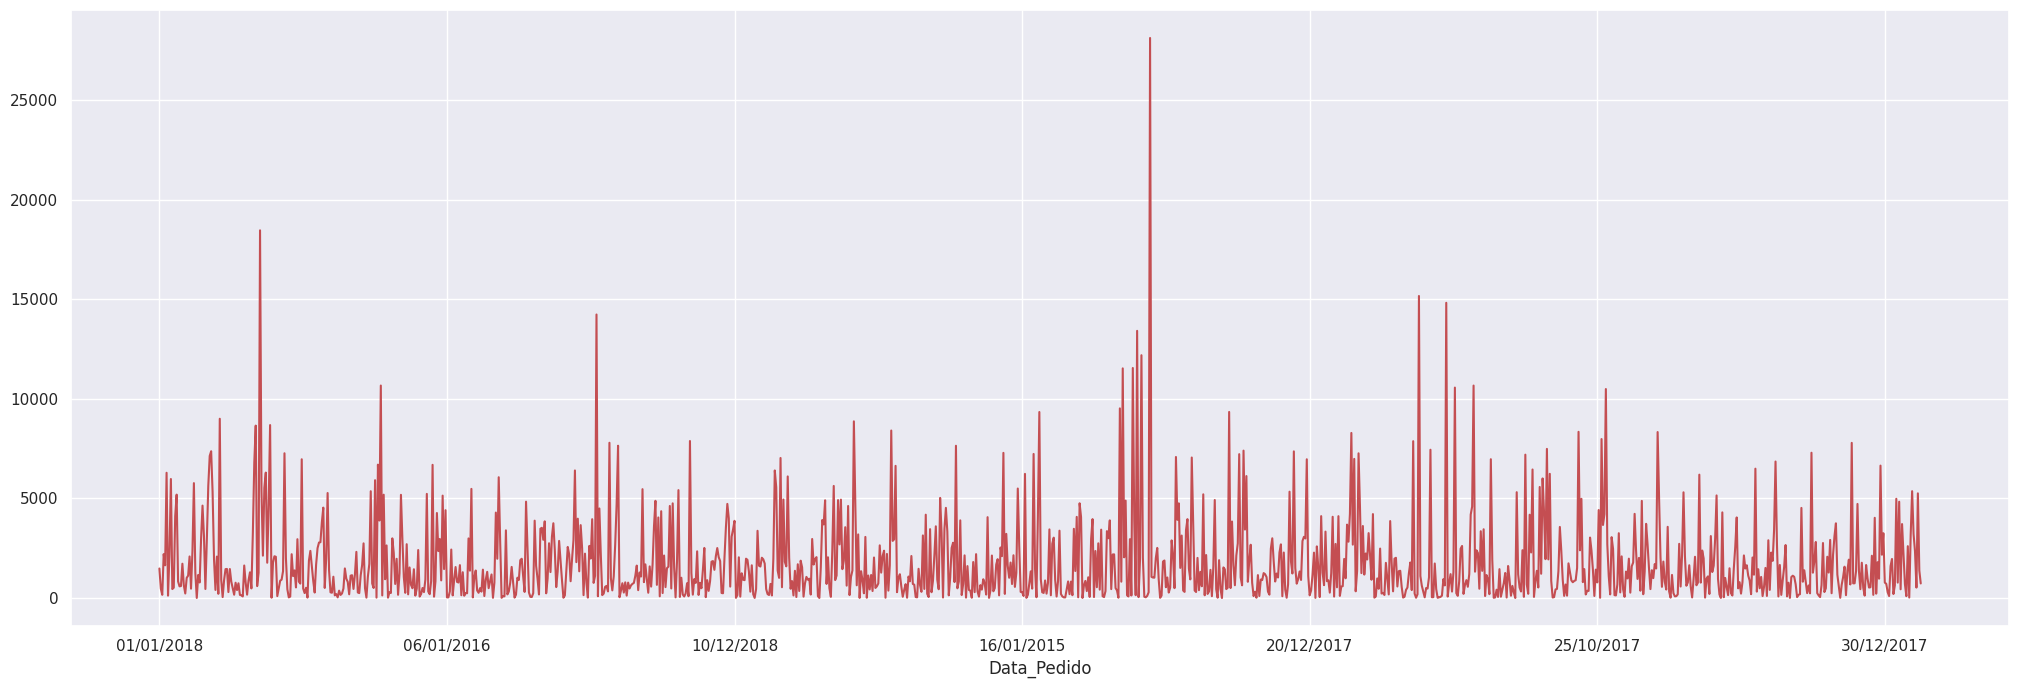

In [62]:
df2 = dfpy.groupby('Data_Pedido')['Valor_Venda'].sum()
plt.figure(figsize=(25,8))
df2.plot(x=dfpy['Data_Pedido'], y=dfpy['Valor_Venda'], color='r') #pode tirar esse: dfpy[] e so deixar o nome da coluna
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

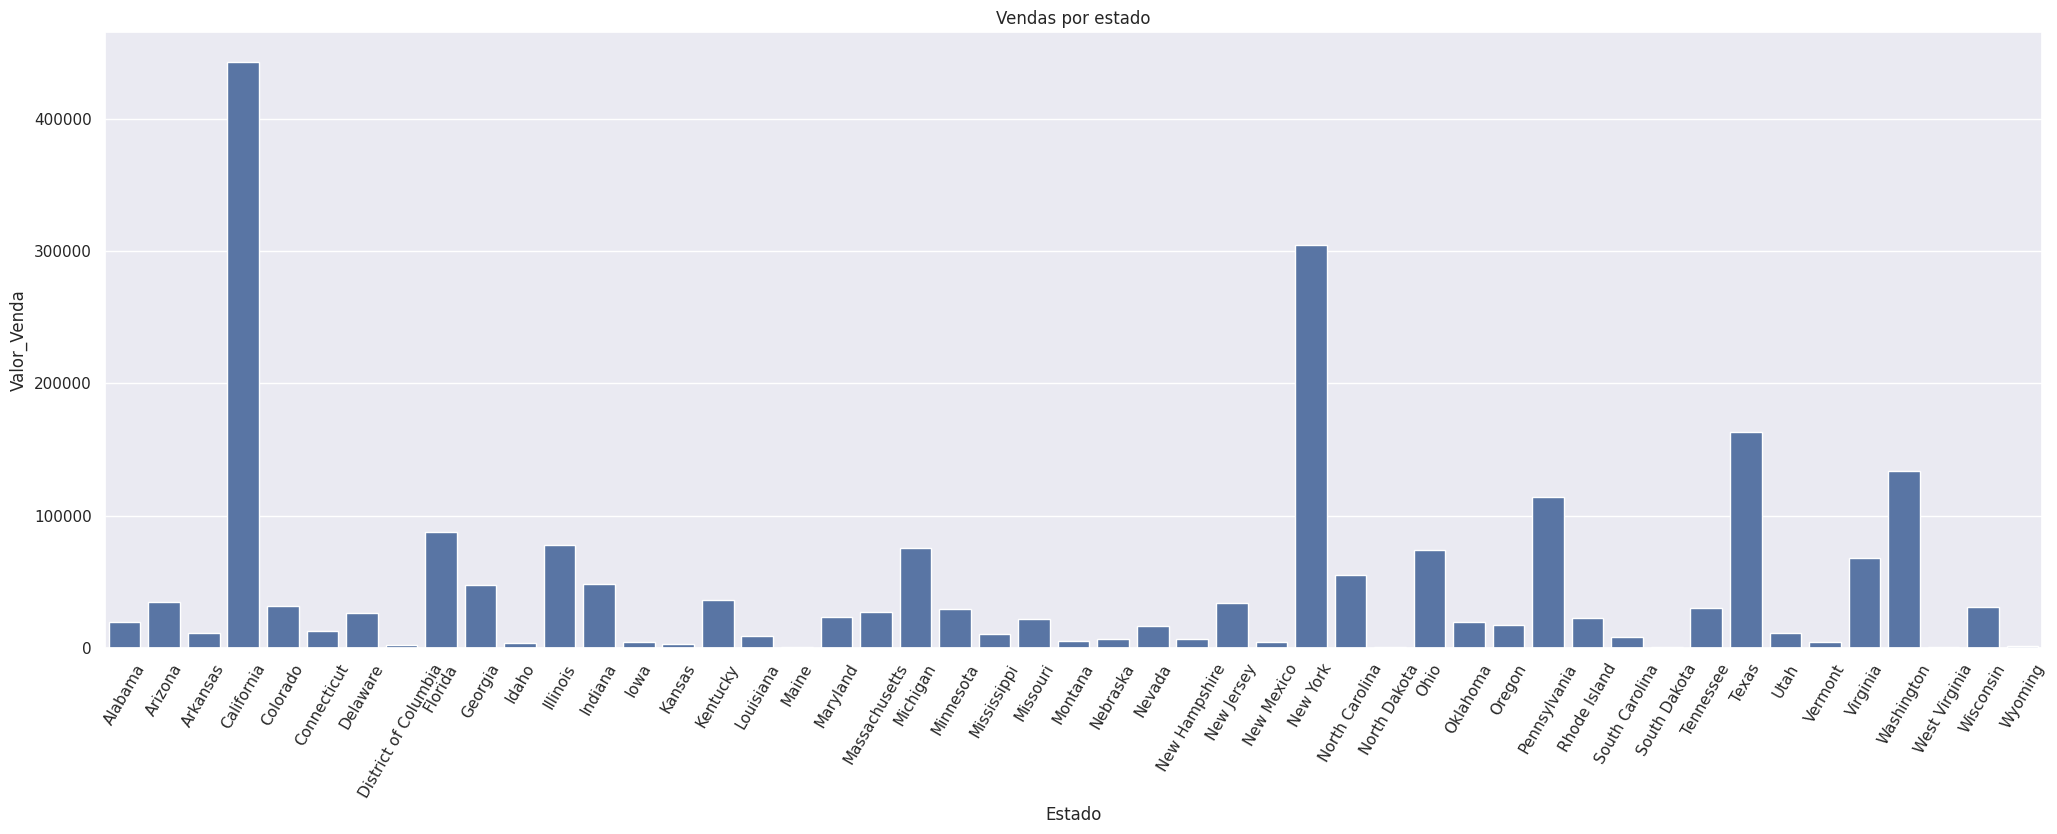

In [63]:
df3 = dfpy.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize=(25,8))
sns.barplot(data = df3, x='Estado', y='Valor_Venda').set(title='Vendas por estado')
plt.xticks(rotation=60)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

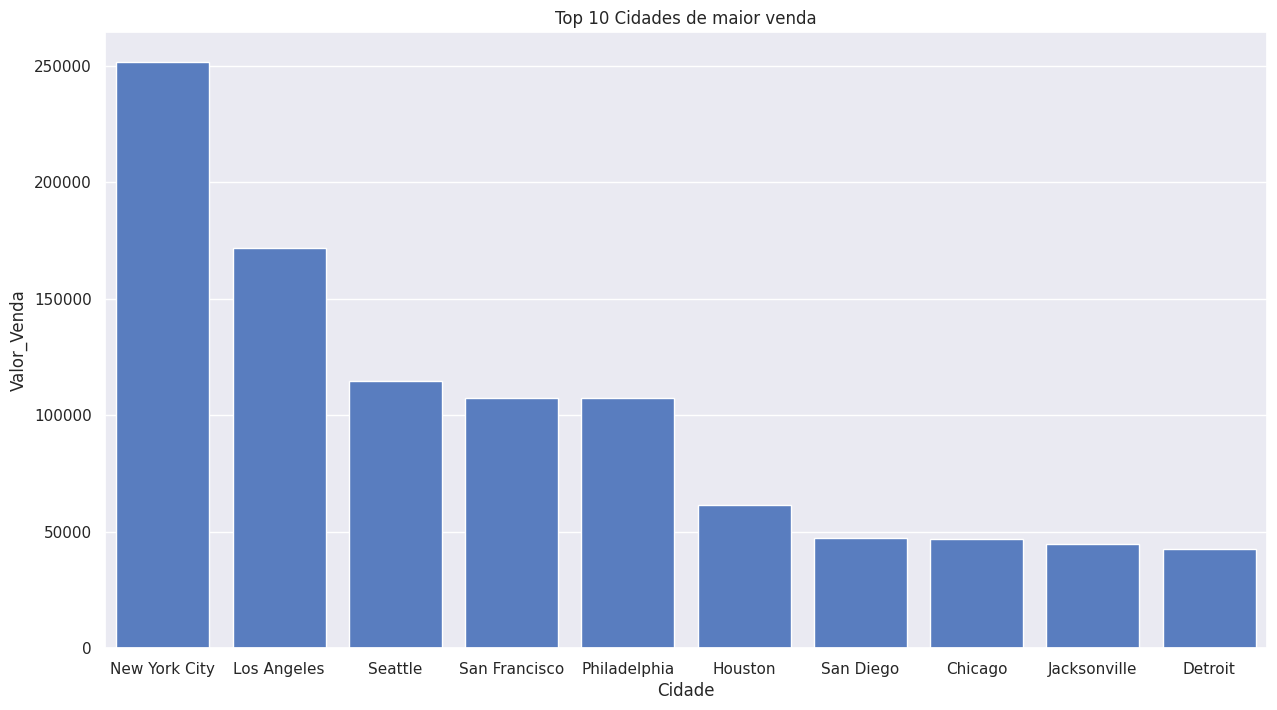

In [64]:
df4 = dfpy.groupby('Cidade')['Valor_Venda'].sum().reset_index()
asc_df4 = df4.sort_values(by='Valor_Venda', ascending=False).head(10)
plt.figure(figsize= (15,8))
sns.set_palette('muted')
sns.barplot(data=asc_df4, x='Cidade', y='Valor_Venda').set(title= 'Top 10 Cidades de maior venda')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [65]:
df5 = dfpy.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)
print(df5.dtypes)
print(df5)
#plt.plot(size=(10,8))
#plt.pie(data=df5, x='Segmento')

Segmento        object
Valor_Venda    float64
dtype: object
      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


In [66]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

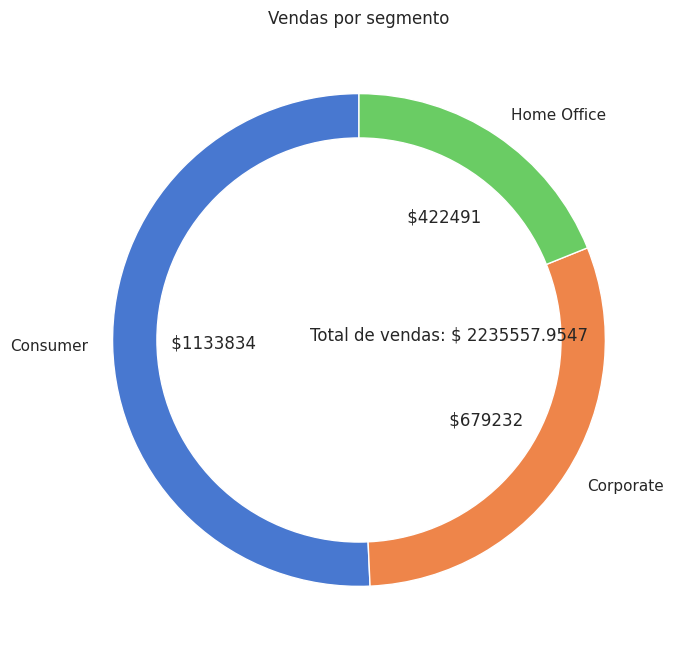

In [67]:
plt.figure(figsize=(10,8))
plt.pie(df5['Valor_Venda'], labels=df5['Segmento'], autopct=autopct_format(df5['Valor_Venda']),startangle=90)
center_info = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()#lables internos
fig.gca().add_artist(center_info)
plt.annotate(text='Total de vendas: $ ' + str(sum(df5['Valor_Venda'])), xy=(-0.2, 0))
plt.title('Vendas por segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [68]:
dfpy['Data_Pedido'] = pd.to_datetime(dfpy['Data_Pedido'],dayfirst=True)
dfpy['Ano'] = dfpy['Data_Pedido'].dt.year
df6 = dfpy.groupby(['Segmento','Ano'])['Valor_Venda'].sum().reset_index()
df6

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [69]:
dfpy['Desconto'] = np.where(dfpy['Valor_Venda'] > 1000, 0.15, 0.10)
dfpy.head(10)
dfpy['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [70]:
dfpy['Venda_Desconto15'] = dfpy['Valor_Venda'] - (dfpy['Valor_Venda'] * dfpy['Desconto'])

In [71]:
dfpy.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Venda_Desconto15
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [72]:
df_antes_desconto = dfpy.loc[dfpy['Desconto'] == 0.15, 'Valor_Venda']
df_depois_desconto = dfpy.loc[dfpy['Desconto'] == 0.15, 'Venda_Desconto15']

In [73]:
media_antes_desconto = df_antes_desconto.mean()
media_depois_desconto = df_depois_desconto.mean()

In [74]:
print('Media das vendas antes do desconto de 15%: ' + str(round(media_antes_desconto, 2)))
print('Media das vendas depois do desconto de 15%: ' + str(round(media_depois_desconto, 2)))

Media das vendas antes do desconto de 15%: 2116.81
Media das vendas depois do desconto de 15%: 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [75]:
dfpy['Mes'] = dfpy['Data_Pedido'].dt.month

In [76]:
df9 = dfpy.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])
df9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [77]:
anos = df9.index.get_level_values(0)
meses = df9.index.get_level_values(1)
segmentos = df9.index.get_level_values(2)

<Figure size 1200x800 with 0 Axes>

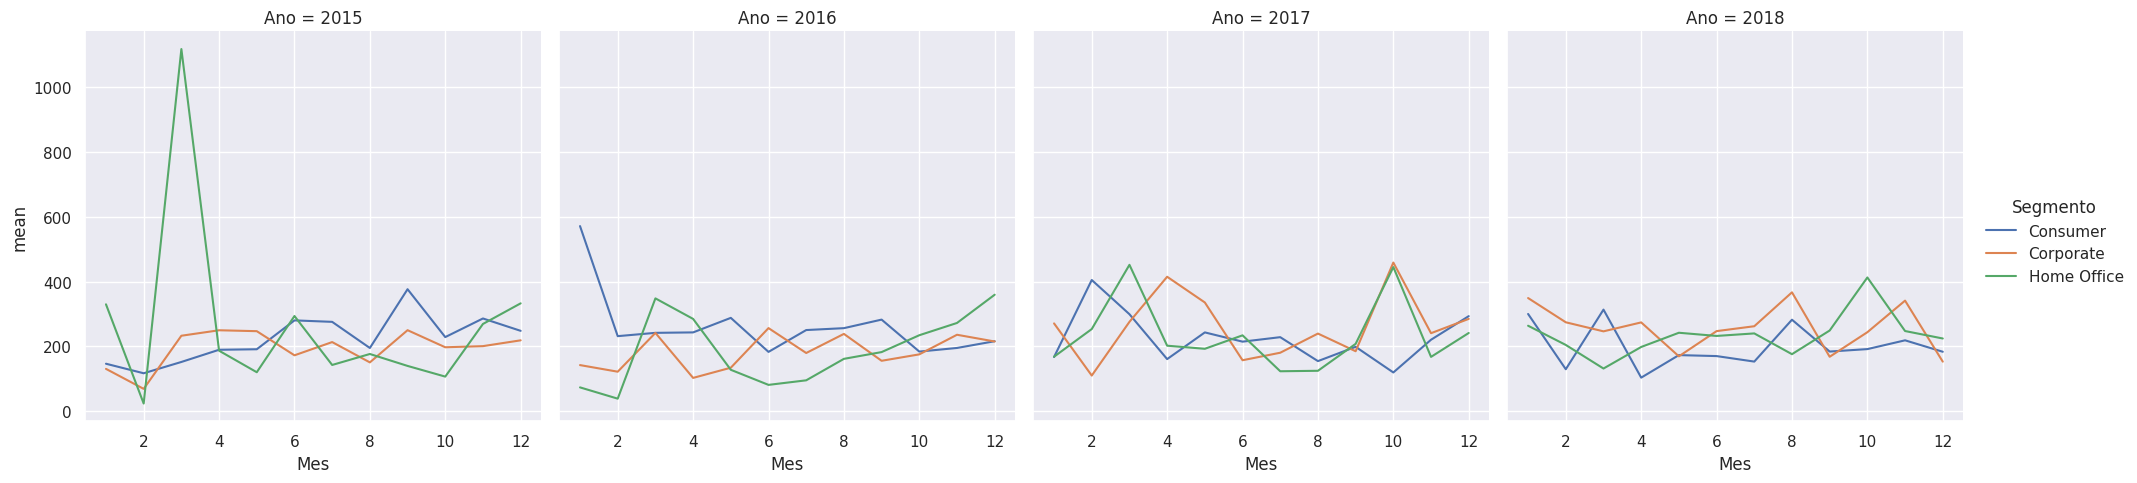

In [78]:
plt.figure(figsize=(12,8))
sns.set()
grafico_media = sns.relplot(kind='line', data=df9, x= meses, y='mean', hue= segmentos , col= anos, col_wrap=4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [79]:
dfpy.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Venda_Desconto15,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [80]:
df10 = dfpy.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values(by='Valor_Venda',ascending=False).head(12)
df10 = df10[['Valor_Venda']].sort_values(by='Categoria',ascending=False).reset_index().head(12)
df10

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.2940
1,Technology,Machines,189238.6310
2,Technology,Accessories,162791.3620
3,Technology,Copiers,146248.0940
4,Office Supplies,Storage,216188.3620
5,Office Supplies,Binders,194723.3810
6,Office Supplies,Appliances,104061.6930
7,Office Supplies,Paper,76312.7640
8,Furniture,Chairs,317919.6250
9,Furniture,Tables,202083.3600


In [81]:
df11 = dfpy.groupby('Categoria')['Valor_Venda'].sum().reset_index()

In [88]:
cores = ['#5d00de','#0ee84f','#e80e27']
cores_sub = ['#aa8cd4','#aa8cd5','#aa8cd6','#aa8cd7','#26c957','#26c958','#26c959','#26c960','#e65e65','#e65e66','#e65e67','#e65e68']

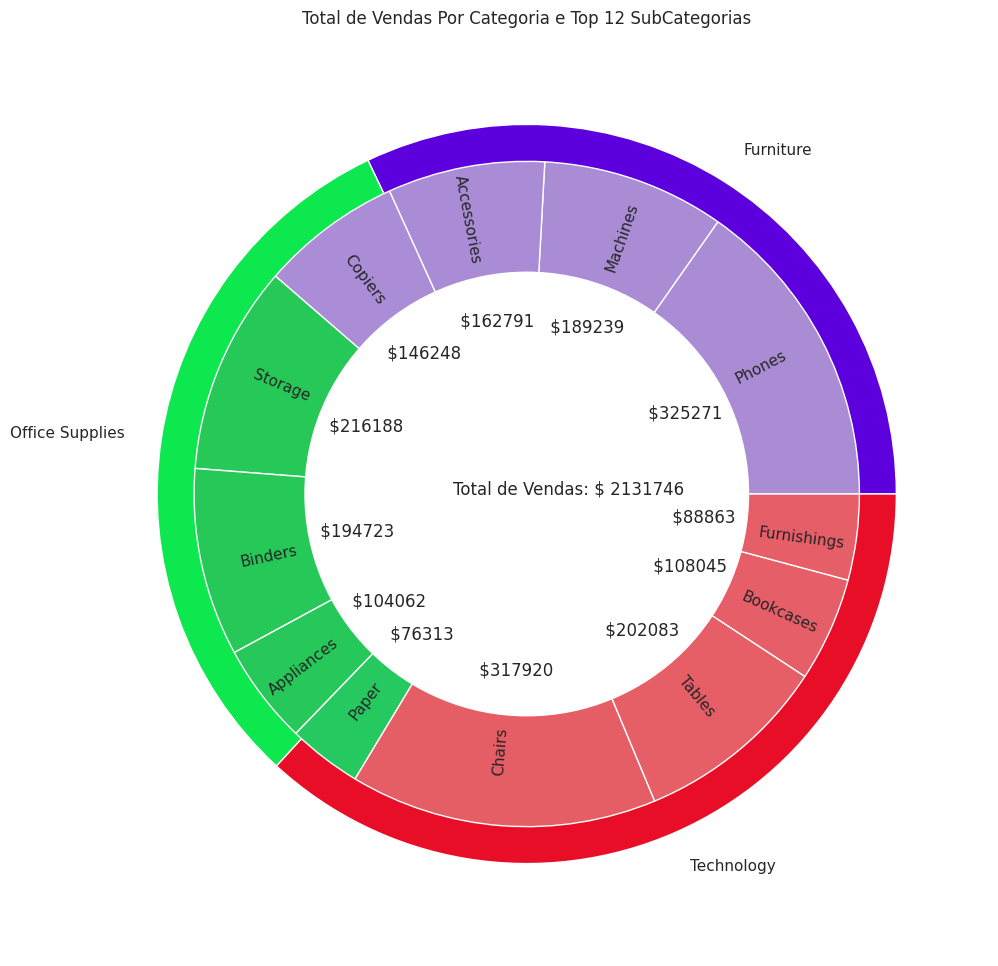

In [90]:
, ax = plt.subplots(figsize = (18,12))

p1 = ax.pie(df11['Valor_Venda'], 
            radius = 1,
            labels = df11['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores)

p2 = ax.pie(df10['Valor_Venda'],
            radius = 0.9,
            labels = df10['SubCategoria'],
            autopct = autopct_format(df10['Valor_Venda']),
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            colors=cores_sub,
            pctdistance = 0.53,
            rotatelabels = True)

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

grp = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim